### Problem Statement:
Analyze the data and generate insights that could help Netflix deciding which type of shows/movies to produce and how they can grow the business in different countries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

: 

In [852]:
df=pd.read_csv("netflix.csv")

In [853]:
original_data=df.copy()

In [854]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [855]:
df.shape

(8807, 12)

In [856]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [857]:
#Data Types of all attributes
df.dtypes 

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [858]:
print("No.of Columns:",df.columns.shape[0])
df.columns

No.of Columns: 12


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [859]:
#count null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Summary Stats:
- Among 12 columns only 1 column is of integer type, Rest of them are of object type

- These columns ('director', 'cast', 'country','date_added','rating', 'duration' ) having NaN values.

- 'date_added' column has to be converted to date_time format.

- Columns like 'director', 'cast', 'listed_in', 'country' having multiple values in single field. So Preprocessing is required. Preprocessing includes unnesting of data in the columns mentioned above.

- Some data points of 'director', 'cast', 'country', 'rating' having white spaces in beginning and ending. So I have trim those white spaces.



#### Converting current format of 'date_added' column to date_time format

In [860]:
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce').dt.date

#### Preprocessing - Unnesting of data


In [861]:
constraint1=df["cast"].apply(lambda x:str(x).split(",")).tolist()
df_new_1=pd.DataFrame(constraint1,index=df["title"])
df_new_1=pd.DataFrame(df_new_1.stack().reset_index())
df_new_1.drop("level_1",axis=1,inplace=True)
df_new_1.rename(columns={0:"cast"},inplace=True)
df_new_1.head()


,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [862]:
constraint2=df["listed_in"].apply(lambda x:str(x).split(",")).tolist()
df_new_2=pd.DataFrame(constraint2,index=df["title"])
df_new_2=pd.DataFrame(df_new_2.stack().reset_index())
df_new_2.drop("level_1",axis=1,inplace=True)
df_new_2.rename(columns={0:"Genre"},inplace=True)
df_new_2.head()


,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [863]:
constraint3=df["country"].apply(lambda x:str(x).split(",")).tolist()
df_new_3=pd.DataFrame(constraint3,index=df["title"])
df_new_3=pd.DataFrame(df_new_3.stack().reset_index())
df_new_3.drop("level_1",axis=1,inplace=True)
df_new_3.rename(columns={0:"country"},inplace=True)
df_new_3.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [864]:
constraint4=df["director"].apply(lambda x:str(x).split(",")).tolist()
df_new_4=pd.DataFrame(constraint4,index=df["title"])
df_new_4=pd.DataFrame(df_new_4.stack().reset_index())
df_new_4.drop("level_1",axis=1,inplace=True)
df_new_4.rename(columns={0:"director"},inplace=True)
df_new_4.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [865]:
df_new=df_new_1.merge(df_new_2,on=["title"],how="inner")
df_new=df_new.merge(df_new_3,on=["title"],how="inner")
df_new=df_new.merge(df_new_4,on=["title"],how="inner")

In [866]:
df=df_new.merge(df[['show_id', 'title','type', 'date_added','release_year', 'rating', 'duration', 'description']],how="inner",on=["title"])

In [867]:
df["cast"].replace(['nan'],['Unknown Actor'],inplace=True)
df["director"].replace(['nan'],['Unknown director'],inplace=True)
df["country"].replace(['nan',np.nan],['Unknown country','Unknown country'],inplace=True)
df["cast"]=df["cast"].str.strip()
df["Genre"]=df["Genre"].str.strip()
df["director"]=df["director"].str.strip()
df["country"]=df["country"].str.strip()
df["rating"]=df["rating"].str.strip()
df["rating"].replace([np.nan],['Unknown rating'],inplace=True)
df["duration"].replace([np.nan],['Unknown duration'],inplace=True)
df["date_added"].replace([np.nan],['Unknown date'],inplace=True)


In [868]:
df['duration'] = df['duration'].apply(lambda x: re.sub(r'\D', '', x))

In [869]:
df.head()

,title,cast,Genre,country,director,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Unknown Actor,Documentaries,United States,Kirsten Johnson,s1,Movie,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,International TV Shows,South Africa,Unknown director,s2,TV Show,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,TV Dramas,South Africa,Unknown director,s2,TV Show,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,TV Mysteries,South Africa,Unknown director,s2,TV Show,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,International TV Shows,South Africa,Unknown director,s2,TV Show,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t..."


In [870]:
# any null values
df.isnull().sum()

title           0
cast            0
Genre           0
country         0
director        0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
description     0
dtype: int64

In [871]:
for col in df.columns[~df.columns.isin(["show_id"])] :
    print(df[col].value_counts())
    print("=============================================================")

Kahlil Gibran's The Prophet    700
Holidays                       504
Movie 43                       468
The Eddy                       416
Narcos                         378
                              ... 
Blackfish                        1
The 2000s                        1
Miniforce: Super Dino Power      1
Dancing with the Birds           1
Dick Johnson Is Dead             1
Name: title, Length: 8807, dtype: int64
Unknown Actor        2149
Liam Neeson           161
Alfred Molina         160
John Krasinski        139
Salma Hayek           130
                     ... 
Peter Dunning           1
Benjamin Bradley        1
Drew Ray Tanner         1
Rena Strober            1
Hrishikesh Hirway       1
Name: cast, Length: 36440, dtype: int64
Dramas                          29806
International Movies            28243
Comedies                        20829
International TV Shows          12845
Action & Adventure              12216
Independent Movies               9834
Children & Family Mov

In [872]:
for col in df.columns :
    print(col,":",df[col].nunique())
    print("=============================================================")

title : 8807
cast : 36440
Genre : 42
country : 124
director : 4994
show_id : 8807
type : 2
date_added : 1715
release_year : 74
rating : 18
duration : 211
description : 8775


### No.of movies and TV Shows released per year

In [873]:
# Count No.of movies and tv shows per year
movie_tv_count_year=df.groupby("release_year")["show_id"].nunique()
movie_tv_count_year=movie_tv_count_year.reset_index().rename({"show_id":"count"},axis=1)
movie_tv_count_year

,release_year,count
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953


<AxesSubplot:xlabel='release_year'>

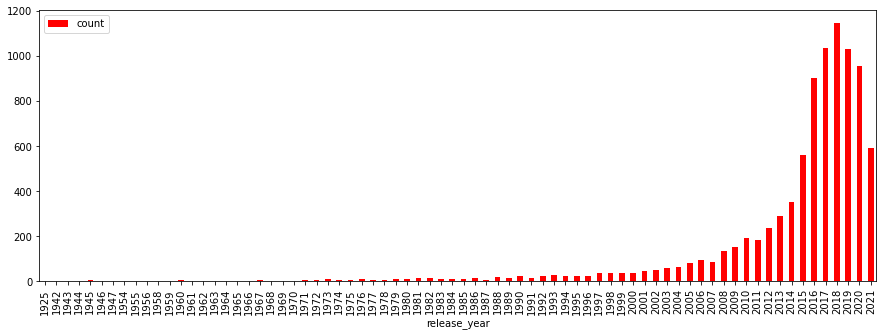

In [874]:
movie_tv_count_year.plot(x="release_year",y="count",kind="bar",figsize=(15,5),color="red")

/Users/lokeshwarsarabu/opt/miniconda3/envs/gbdt/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

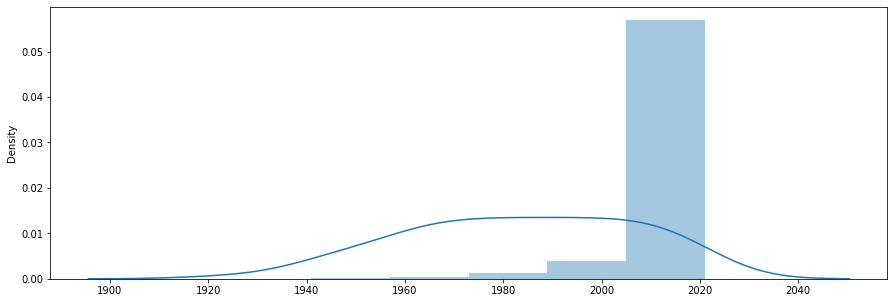

In [875]:

fig,ax=plt.subplots(figsize=(15,5))
sns.distplot(list(movie_tv_count_year["release_year"]), 
    hist_kws={
        "weights": list(movie_tv_count_year["count"])
    },ax=ax
)



In [876]:
movie_count_year=df[df["type"]=="Movie"].groupby("release_year")["show_id"].nunique()
tv_show_count_year=df[df["type"]=="TV Show"].groupby("release_year")["show_id"].nunique()
movie_count_year=movie_count_year.reset_index().rename({"show_id":"count"},axis=1)
tv_show_count_year=tv_show_count_year.reset_index().rename({"show_id":"count"},axis=1)
show_count_year=movie_count_year.merge(tv_show_count_year,how="left",on=["release_year"])

In [877]:
show_count_year.replace(np.nan,0,inplace=True)
show_count_year.rename(columns={"count_x":"movie_count","count_y":"tv_count"},inplace=True)
show_count_year

,release_year,movie_count,tv_count
0,1942,2,0.0
1,1943,3,0.0
2,1944,3,0.0
3,1945,3,1.0
4,1946,1,1.0
...,...,...,...
68,2017,767,265.0
69,2018,767,380.0
70,2019,633,397.0
71,2020,517,436.0


#### How has the number of movies and tv shows released per year changed over the last 10 years?

### Points:
- Most number of movies were released in the year 2017-2018
- Most number of TV Shows were released in the year 2019-2020


<AxesSubplot:xlabel='release_year'>

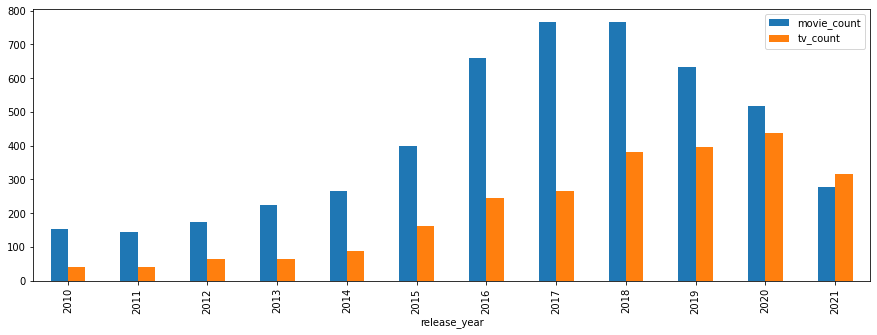

In [878]:
show_count_year[show_count_year["release_year"]>=2010].plot(x="release_year",y=["movie_count","tv_count"],kind="bar",figsize=(15,5))

<AxesSubplot:xlabel='type', ylabel='release_year'>

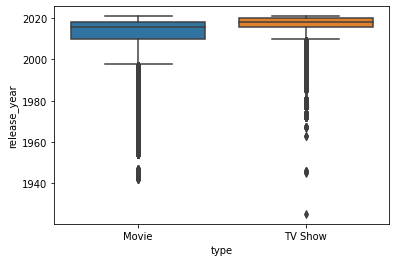

In [879]:
sns.boxplot(x="type",y="release_year",data=df)

### What is the best time to launch a TV show or movie?


#### Daily Trend of Content Upload

#### Points:
- More Number of TV shows or Movies were added on Friday

In [880]:
original_data["date_added"]=pd.to_datetime(original_data["date_added"],errors='coerce').dt.date
original_data['Day'] = pd.DatetimeIndex(original_data['date_added']).day_name()

/Users/lokeshwarsarabu/opt/miniconda3/envs/gbdt/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Day', ylabel='count'>

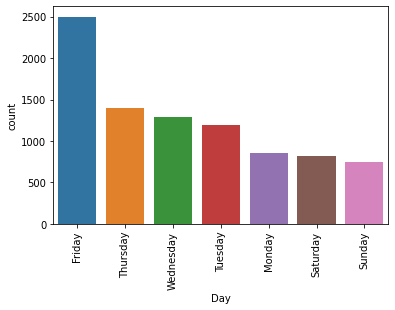

In [881]:
plt.xticks(rotation=90)
sns.countplot(original_data['Day'],order=original_data["Day"].value_counts().index)


#### Monthly Trend of Content Upload

/Users/lokeshwarsarabu/opt/miniconda3/envs/gbdt/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='month', ylabel='count'>

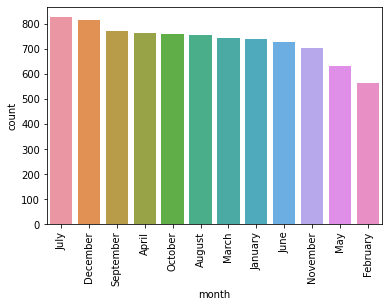

In [882]:
original_data["month"]=pd.DatetimeIndex(original_data["date_added"]).month_name()
plt.xticks(rotation=90)
sns.countplot(original_data["month"],order=original_data["month"].value_counts().index)

### No.of Movies and Tv Shows are released on Netflix?
#### Points:
- No.of Movies on Netflix : 6131 (69%)
- No.of TV Shows on Netflix : 2676 (31%)
- The Dataset is Imbalanced.


type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64


<AxesSubplot:xlabel='type'>

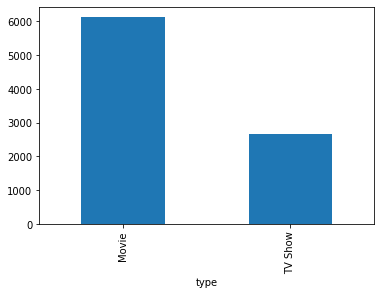

In [883]:
type_count=df.groupby("type")["show_id"].nunique()
print(type_count)
type_count.plot(kind="bar")

### No.of Movies or TV Shows for each rating?

#### Points :
- Most No.of TV Shows or Movies are designed to be viewed by adults.

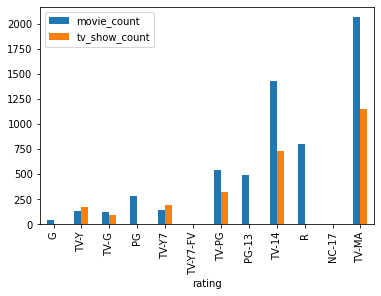

In [884]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_movie_count=df[(df["type"]=="Movie") & (df["rating"].isin(rating_order)) ].groupby("rating")["show_id"].nunique()
rating_tv_show_count=df[(df["type"]=="TV Show") & (df["rating"].isin(rating_order))].groupby("rating")["show_id"].nunique()
rating_movie_count=rating_movie_count.reset_index().rename({"show_id":"movie_count"},axis=1)
rating_tv_show_count=rating_tv_show_count.reset_index().rename({"show_id":"tv_show_count"},axis=1)
rating_count=rating_movie_count.merge(rating_tv_show_count,how="outer",on=["rating"])
rating_count["rating_num"]=rating_count["rating"].apply(lambda x : rating_order.index(x))
rating_count.sort_values(by="rating_num",inplace=True)
rating_count.plot(x="rating",y=["movie_count","tv_show_count"],kind="bar")
plt.show()


<AxesSubplot:xlabel='category'>

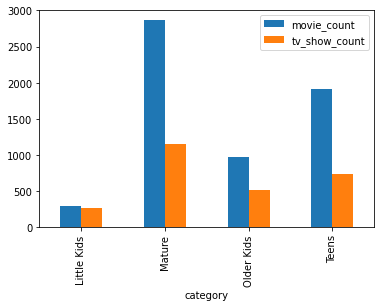

In [885]:
def cat_rating(data):
    if data>=0 and data<=2:
        return "Little Kids"
    elif data>=3 and data<=6:
        return "Older Kids"
    elif data>=7 and data<=8:
        return "Teens"
    else:
        return "Mature"
rating_count["category"]=rating_count["rating_num"].apply(cat_rating)
category_movie_count=rating_count.groupby("category")["movie_count"].sum().reset_index()
category_tv_show_count=rating_count.groupby("category")["tv_show_count"].sum().reset_index()
category_count=category_movie_count.merge(category_tv_show_count,how="inner",on=["category"])
category_count.plot(x="category",y=["movie_count","tv_show_count"],kind="bar")

In [886]:
category_count[category_count['category']=="Mature"]["movie_count"]/category_count["movie_count"].sum()

1    0.473214
Name: movie_count, dtype: float64

In [887]:
category_count[category_count['category']=="Mature"]["tv_show_count"]/category_count["tv_show_count"].sum()

1    0.429749
Name: tv_show_count, dtype: float64

### Top 10 Genres
Points:
- The top Genre of Movies are International Movies, Dramas, Comedies
- The top Genre of TV Shows International TV Shows, TV Dramas, TV Comedies


<AxesSubplot:xlabel='Genre'>

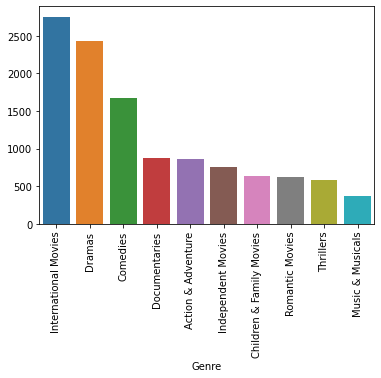

In [888]:
top_10_movie_genre=df[df["type"]=="Movie"].groupby("Genre")["show_id"].nunique().sort_values(ascending=False)[:10]
plt.xticks(rotation=90)
sns.barplot(x=top_10_movie_genre.index,y=top_10_movie_genre.values)

<AxesSubplot:xlabel='Genre'>

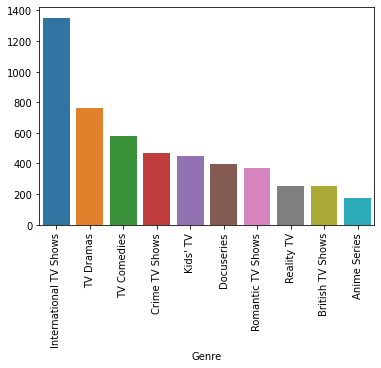

In [889]:
top_10_show_genre=df[df["type"]=="TV Show"].groupby("Genre")["show_id"].nunique().sort_values(ascending=False)[:10]
plt.xticks(rotation=90)
sns.barplot(x=top_10_show_genre.index,y=top_10_show_genre.values)

### Top 10 Countries with highest Number of movies or TV Shows released

<AxesSubplot:xlabel='country'>

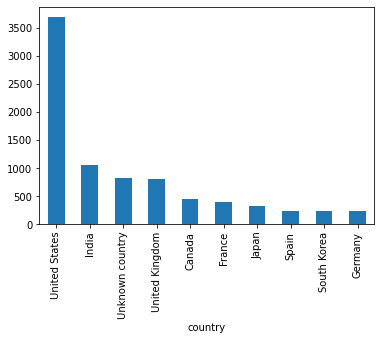

In [890]:
top_10_country=df.groupby("country")["show_id"].nunique().sort_values(ascending=False)[:10]
top_10_country.plot(kind="bar")

### Top 10 Actors with highest number of shows and Movies

#### Points:
- The top actors with highest number of movies are "Anupam Kher","Shah Rukh Khan"....
- The top actors with highest number of TV Shows are 'Takahiro Sakurai', 'Yuki Kaji'....

<AxesSubplot:xlabel='cast'>

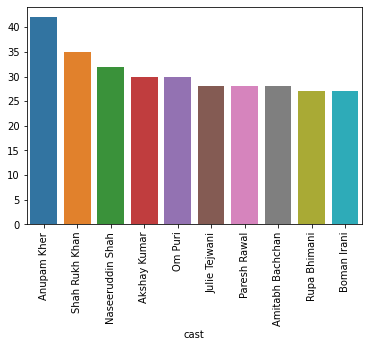

In [891]:
top_10_movie_actors=df[(df["cast"]!="Unknown Actor") & (df["type"]=="Movie")].groupby("cast")["show_id"].nunique().sort_values(ascending=False).iloc[:10]
plt.xticks(rotation=90)
sns.barplot(x=top_10_movie_actors.index,y=top_10_movie_actors.values)

<AxesSubplot:xlabel='cast'>

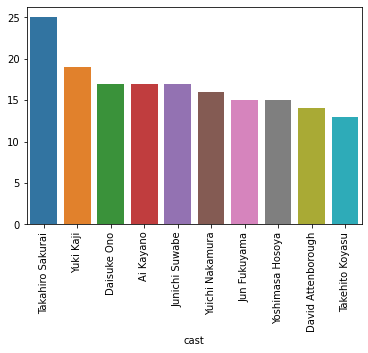

In [892]:
top_10_tv_actors=df[(df["cast"]!="Unknown Actor") & (df["type"]=="TV Show")].groupby("cast")["show_id"].nunique().sort_values(ascending=False).iloc[:10]
plt.xticks(rotation=90)
sns.barplot(x=top_10_tv_actors.index,y=top_10_tv_actors.values)

### Top 10 Directors on Netflix with highest number of titles
#### Points:
- The top 3 directors with highest number of Movies are 'Rajiv Chilaka', 'Jan Suter', 'Raúl Campos'.

- The top 3 directors with highest number of TV Shows are 'Ken Burns', 'Alastair Fothergill', 'Stan Lathan'.


<AxesSubplot:xlabel='director', ylabel='count'>

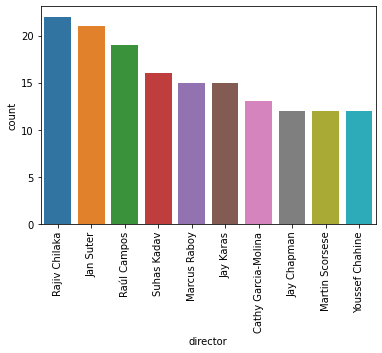

In [893]:
top_10_movie_directors=df[(df["director"]!="Unknown director") & (df["type"]=="Movie")].\
    groupby("director")["show_id"].nunique().reset_index().\
    rename({"show_id":"count"},axis=1).sort_values(by=["count"],ascending=False).iloc[:10]
plt.xticks(rotation=90)
sns.barplot(x=top_10_movie_directors["director"],y=top_10_movie_directors["count"])

<AxesSubplot:xlabel='director', ylabel='count'>

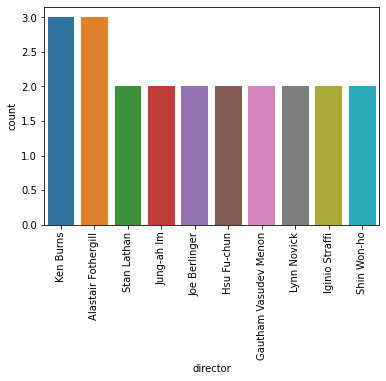

In [894]:
top_10_tv_show_directors=df[(df["director"]!="Unknown director") & (df["type"]=="TV Show")].\
    groupby("director")["show_id"].nunique().reset_index().\
    rename({"show_id":"count"},axis=1).sort_values(by=["count"],ascending=False).iloc[:10]
plt.xticks(rotation=90)
sns.barplot(x=top_10_tv_show_directors["director"],y=top_10_tv_show_directors["count"])

### Duration Trend
#### Points:
- Majority of movies on netflix are around 90 mins
- Majority of TV Shows on netflix with 1 season.
- There are some outliers of each type in duration column. 

In [895]:
movie_duration=df[df["type"]=="Movie"][["show_id","duration"]].drop_duplicates()
movie_duration=movie_duration.drop(movie_duration[movie_duration["duration"]==""].index,axis=0)
movie_duration["duration"]=movie_duration["duration"].apply(lambda x : int(x))

<AxesSubplot:xlabel='duration', ylabel='Count'>

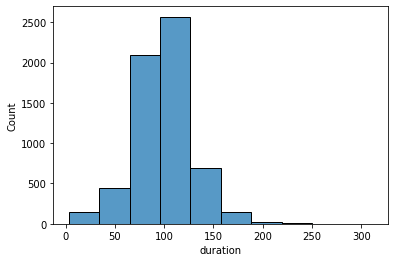

In [896]:
sns.histplot(movie_duration["duration"],bins=10)

<AxesSubplot:xlabel='duration', ylabel='Count'>

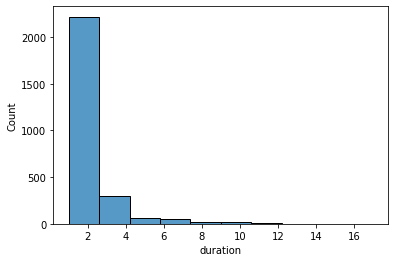

In [897]:
tv_show_duration=df[df["type"]=="TV Show"][["show_id","duration"]].drop_duplicates()
tv_show_duration["duration"]=tv_show_duration["duration"].apply(lambda x : int(x))
sns.histplot(tv_show_duration["duration"],bins=10)

/Users/lokeshwarsarabu/opt/miniconda3/envs/gbdt/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='duration', ylabel='Density'>

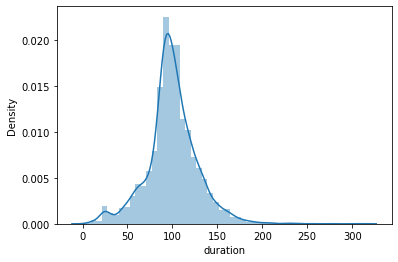

In [898]:
sns.distplot(movie_duration["duration"])

/Users/lokeshwarsarabu/opt/miniconda3/envs/gbdt/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='duration', ylabel='Density'>

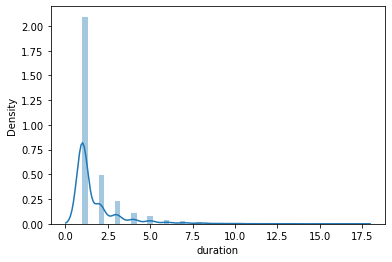

In [899]:
sns.distplot(tv_show_duration["duration"])

In [900]:
df=df.drop(df[df["duration"]==""].index,axis=0)
df["duration"]=df["duration"].apply(lambda x : int(x))

<AxesSubplot:xlabel='type', ylabel='duration'>

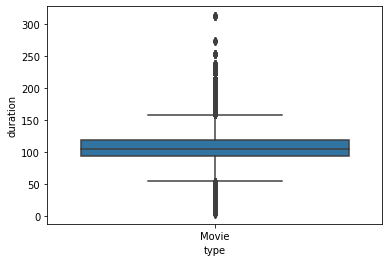

In [901]:
sns.boxplot(x=df[df["type"]=="Movie"]["type"],y=df[df["type"]=="Movie"]["duration"])

<AxesSubplot:xlabel='type', ylabel='duration'>

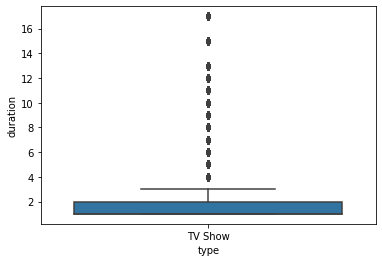

In [902]:
sns.boxplot(x=df[df["type"]=="TV Show"]["type"],y=df[df["type"]=="TV Show"]["duration"])

### The distribution of movies/shows produced in each country on the basis of genres.

In [903]:
x=df.groupby(["country","Genre"])["title"].count().reset_index()
x=x.sort_values(by=["country","title"],ascending=[True,False])
x=x.replace('','Unknown country')
x=x[x["country"]!="Unknown country"]

In [904]:
x=x.drop_duplicates(keep=False)

In [905]:
result=x.pivot_table(index="country",columns="Genre",values="title",aggfunc="sum")

In [906]:
result.fillna(0)

Genre,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Argentina,41.0,0.0,0.0,0.0,45.0,10.0,10.0,139.0,75.0,20.0,...,0.0,11.0,19.0,8.0,0.0,0.0,0.0,0.0,11.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vatican City,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Venezuela,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
Vietnam,11.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


<AxesSubplot:xlabel='Genre', ylabel='country'>

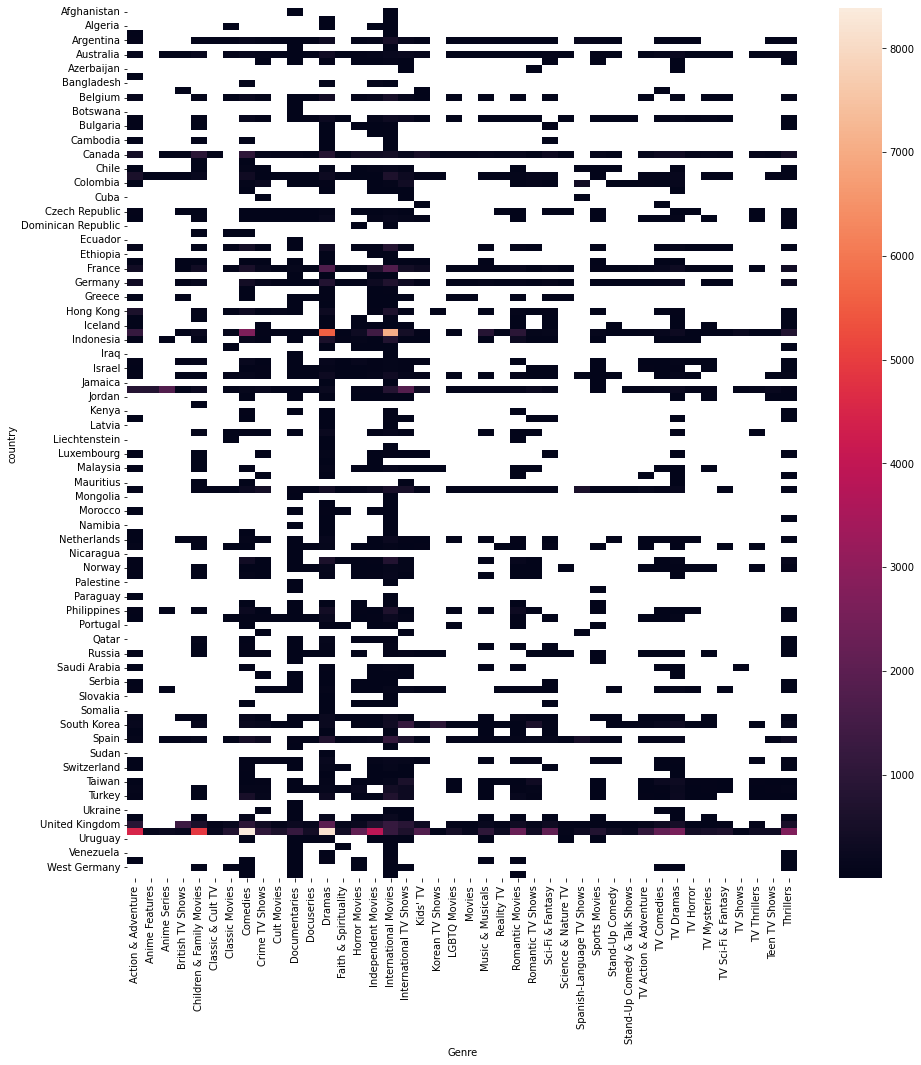

In [907]:
plt.figure(figsize=(15,16))
sns.heatmap(result)


### Delay in adding the movies and TV Shows
#### Points:
- More than 2000 titles are added to netflix after 2 Years of actual release.
- 52 titles are added to netflix after 50 years if actual release.

In [909]:
df["date_added"]=pd.to_datetime(df["date_added"],errors='coerce').dt.date

df["added_year"]= pd.DatetimeIndex(df['date_added']).year

In [910]:
df.dropna(inplace=True)

In [911]:
df['added_year'].isna().any()


False

In [912]:
df["delay"]=df["added_year"]-df["release_year"]

In [913]:
show_wise_delay=df[df["delay"]>=1][['delay','show_id']].groupby("show_id")["delay"].unique().apply(lambda x:int(x[0]))

/Users/lokeshwarsarabu/opt/miniconda3/envs/gbdt/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='delay', ylabel='count'>

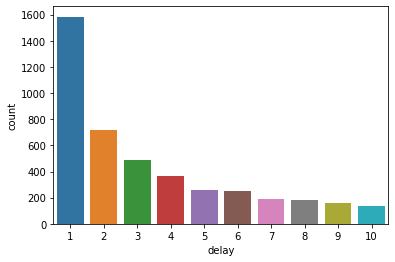

In [914]:
sns.countplot(show_wise_delay[show_wise_delay<=10])

/Users/lokeshwarsarabu/opt/miniconda3/envs/gbdt/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='delay', ylabel='count'>

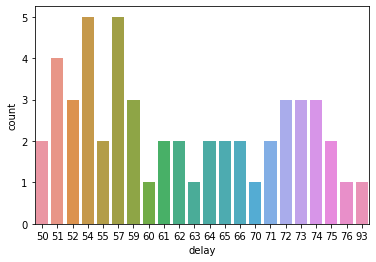

In [915]:
sns.countplot(show_wise_delay[show_wise_delay>=50])

### Business Insights:
- The dataset contains 8807 rows and 12 columns. 

- The 12 columns are [show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added','release_year', 'rating', 'duration', 'listed_in', 'description']

- No.of Movies on Netflix: 6131(69%)

- No.of TV Shows on Netflix: 2676(31%)

- The most content type on netflix is Movies.

- Most no.of movies on netflix were released from 2017-2018.

- Most no.of TV Shows on Netflix were released from 2019-2020.

- Most no.of TV Shows and Movies were added on Friday.

- Most no.of TV Shows and Movies were added on July Month.

- Most No.of TV Shows and Movies are designed to be viewed by adults.

- The top 3 Genre of Movies are International Movies, Dramas, Comedies.

- The top 3 Genre of TV Shows International TV Shows, TV Dramas, TV Comedies.

- United States and India has highest number of TV Shows and Movies.

- The top 2 actors with highest number of movies are "Anupam Kher","Shah Rukh Khan". 


- The top 2 actors with highest number of TV Shows are 'Takahiro Sakurai', 'Yuki Kaji'.

- The top 3 directors with highest number of Movies are 'Rajiv Chilaka', 'Jan Suter', 'Raúl Campos'.

- The top 3 directors with highest number of TV Shows are 'Ken Burns', 'Alastair Fothergill', 'Stan Lathan'.

- Majority of movies on netflix are around 90 mins.

- Majority of TV Shows on netflix with 1 season.

- More than 2000 titles are added to netflix after 2 Years of actual release.

- 52 titles are added to netflix after 50 years if actual release.



### Recommendations:

- As the most content type is Movies , I would recommend them to produce movies in future.

- Best day to release a TV Show or Movies is on Friday's. 

- Best months to release a TV Show or Movie are July,December,September.

- I would recommend the Netflix to produce a movie in future with genres like "International Movies", "Dramas" , "Comedies".

- I would recommend the Netflix to produce a TV Show in future with genres like "TV Shows", "TV Dramas" , "TV Comedies".

- I would recommend the netflix to produce a movie with top Indian Actors like "Anupam Kher","Shah Rukh Khan" , as they have most number of titles released on netflix.

- I would recommend the netflix to produce a TV Show with top Japanese Actors like 'Takahiro Sakurai', 'Yuki Kaji' , as they have most number of titles released on netflix.

- I would recommend the netflix to produce a movie with Indian director Rajiv Chilaka. He has highest number of titles released.

- I would recommend the netflix to produce a TV Show with American film maker Ken Burns. He has highest number of titles released.

- I would recommend netflix to keep movie duration around 90 mins.

- Around 47% content on netflix given Mature rating. Adding kids content may increase the subscribers.

- I would recommend the netflix to reduce delay between actual release and release year on netflix
